<a href="https://colab.research.google.com/github/fii-optim-lab/RO-AI-Training/blob/master/session07-Regression/ML_Regression_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Regression Tutorial

This notebook covers two fundamental machine learning algorithms:
1. **Linear Regression** - for predicting continuous values
2. **Logistic Regression** - for binary classification

For each algorithm, you will:
- Implement it from scratch (with framework provided)
- Use sklearn's implementation
- Work with multiple datasets
- Evaluate using appropriate metrics
- Experiment with hyperparameters

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import (load_breast_cancer, load_iris,
                               fetch_california_housing,
                               make_regression, make_classification)
from sklearn.metrics import (mean_squared_error, mean_absolute_error,
                             r2_score, accuracy_score, f1_score)

# Set random seed for reproducibility
np.random.seed(42)

# Helper function to display regression metrics
def print_regression_metrics(y_true, y_pred, model_name="Model"):
    """
    Print regression metrics in a formatted table.

    Parameters:
    -----------
    y_true : array-like
        True target values
    y_pred : array-like
        Predicted target values
    model_name : str
        Name of the model for display
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    metrics_df = pd.DataFrame({
        'Metric': ['Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)',
                   'Mean Absolute Error (MAE)', 'R-squared (R²)'],
        'Value': [f'{mse:.4f}', f'{rmse:.4f}', f'{mae:.4f}', f'{r2:.4f}']
    })

    print(f"\n{'='*50}")
    print(f"{model_name} - Regression Metrics")
    print(f"{'='*50}")
    print(metrics_df.to_string(index=False))
    print(f"{'='*50}\n")

# Helper function to display classification metrics
def print_classification_metrics(y_true, y_pred, model_name="Model"):
    """
    Print classification metrics in a formatted table.

    Parameters:
    -----------
    y_true : array-like
        True class labels
    y_pred : array-like
        Predicted class labels
    model_name : str
        Name of the model for display
    """
    accuracy = accuracy_score(y_true, y_pred)
    f1_weighted = f1_score(y_true, y_pred, average='weighted')
    f1_macro = f1_score(y_true, y_pred, average='macro')

    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'F1 Score (Weighted)', 'F1 Score (Macro)'],
        'Value': [f'{accuracy:.4f}', f'{f1_weighted:.4f}', f'{f1_macro:.4f}']
    })

    print(f"\n{'='*50}")
    print(f"{model_name} - Classification Metrics")
    print(f"{'='*50}")
    print(metrics_df.to_string(index=False))
    print(f"{'='*50}\n")

---

## Section 1: Linear Regression

Linear Regression is used to predict continuous target variables. We'll implement it using the **Normal Equation** (closed-form solution), which directly computes the optimal weights without iteration.

### Mathematical Background

The Normal Equation gives us the optimal weights directly:

**θ = (X<sup>T</sup>X)<sup>-1</sup> X<sup>T</sup>y**

Where:
- **θ** is the weight vector (including bias if fit_intercept=True)
- **X** is the feature matrix
- **y** is the target vector

This is preferred over gradient descent for Linear Regression because it gives the exact optimal solution in one step.

### 1.1 From-Scratch Implementation

Complete the `fit` and `predict` methods in the `LinearRegressionScratch` class below.

In [2]:
class LinearRegressionScratch:
    """
    Linear Regression implementation from scratch using Normal Equation.

    Parameters:
    -----------
    fit_intercept : bool, default=True
        Whether to calculate the intercept (bias term).
        If False, the data is assumed to be already centered.
    """

    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
        self.weights = None  # Will store the learned weights (θ)

    def fit(self, X, y):
        """
        Fit the linear regression model using Normal Equation.

        TODO: Implement the Normal Equation to compute optimal weights.
        Formula: θ = (X^T X)^(-1) X^T y

        Steps:
        1. If fit_intercept=True, add a column of ones to X for the bias term
        2. Compute X^T X
        3. Compute (X^T X)^(-1) using np.linalg.inv() or np.linalg.pinv()
        4. Compute X^T y
        5. Multiply to get θ = (X^T X)^(-1) X^T y
        6. Store the result in self.weights

        Parameters:
        -----------
        X : array-like of shape (n_samples, n_features)
            Training features
        y : array-like of shape (n_samples,)
            Target values

        Returns:
        --------
        self : object
            Returns self for method chaining
        """
        X = np.array(X)
        y = np.array(y).reshape(-1, 1)

        # TODO: Your implementation here
        # Hint: Use np.ones() to add intercept column if needed
        # Hint: Use @ for matrix multiplication, or np.dot()
        # Hint: Use np.linalg.pinv() for more numerical stability than inv()

        pass

    def predict(self, X):
        """
        Predict target values for given features.

        TODO: Implement prediction using the learned weights.
        Formula: y_pred = X @ θ

        Steps:
        1. If fit_intercept=True, add a column of ones to X
        2. Compute y_pred = X @ self.weights
        3. Return the predictions (flatten if needed)

        Parameters:
        -----------
        X : array-like of shape (n_samples, n_features)
            Features to predict

        Returns:
        --------
        y_pred : array of shape (n_samples,)
            Predicted target values
        """
        X = np.array(X)

        # TODO: Your implementation here

        pass

### 1.2 Using sklearn's Linear Regression

Now let's see how to use sklearn's implementation, which uses the same Normal Equation approach under the hood.

### 1.3 Dataset 1: California Housing Prices

Let's start with a real-world dataset - California housing prices.

In [3]:
# Load California Housing dataset
california_housing = fetch_california_housing()
X_ca = california_housing.data
y_ca = california_housing.target

print(f"Dataset shape: {X_ca.shape}")
print(f"Features: {california_housing.feature_names}")
print(f"Target: Median House Value (in hundreds of thousands of dollars)")
print(f"\nFirst few samples:")
print(pd.DataFrame(X_ca[:5], columns=california_housing.feature_names))

# Split into train and test sets
X_train_ca, X_test_ca, y_train_ca, y_test_ca = train_test_split(
    X_ca, y_ca, test_size=0.2, random_state=42
)

# Scale features (important for numerical stability)
scaler_ca = StandardScaler()
X_train_ca_scaled = scaler_ca.fit_transform(X_train_ca)
X_test_ca_scaled = scaler_ca.transform(X_test_ca)

print(f"\nTraining set size: {X_train_ca_scaled.shape[0]}")
print(f"Test set size: {X_test_ca_scaled.shape[0]}")

Dataset shape: (20640, 8)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: Median House Value (in hundreds of thousands of dollars)

First few samples:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Training set size: 16512
Test set size: 4128



sklearn Linear Regression - California Housing - Regression Metrics
                        Metric  Value
      Mean Squared Error (MSE) 0.5559
Root Mean Squared Error (RMSE) 0.7456
     Mean Absolute Error (MAE) 0.5332
                R-squared (R²) 0.5758



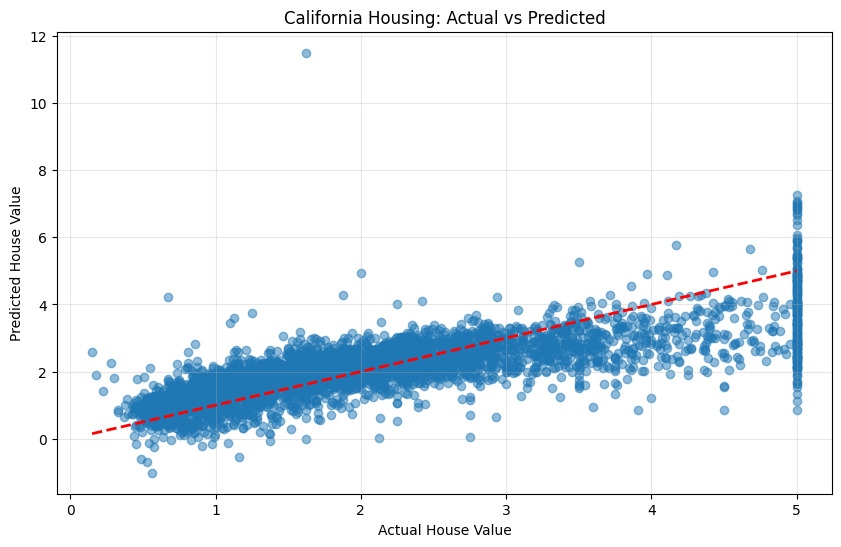

In [4]:
# Train sklearn Linear Regression
lr_sklearn_ca = LinearRegression(fit_intercept=True)
lr_sklearn_ca.fit(X_train_ca_scaled, y_train_ca)

# Make predictions
y_pred_sklearn_ca = lr_sklearn_ca.predict(X_test_ca_scaled)

# Display metrics
print_regression_metrics(y_test_ca, y_pred_sklearn_ca, "sklearn Linear Regression - California Housing")

# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test_ca, y_pred_sklearn_ca, alpha=0.5)
plt.plot([y_test_ca.min(), y_test_ca.max()], [y_test_ca.min(), y_test_ca.max()], 'r--', lw=2)
plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.title('California Housing: Actual vs Predicted')
plt.grid(True, alpha=0.3)
plt.show()

### 1.4 Dataset 2: Synthetic Regression Dataset

Now let's work with a synthetic dataset where we can control the complexity.

In [5]:
# Generate synthetic regression dataset
X_syn, y_syn = make_regression(n_samples=1000, n_features=5, noise=10, random_state=42)

print(f"Dataset shape: {X_syn.shape}")
print(f"Target range: [{y_syn.min():.2f}, {y_syn.max():.2f}]")

# Split into train and test sets
X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(
    X_syn, y_syn, test_size=0.2, random_state=42
)

# Scale features
scaler_syn = StandardScaler()
X_train_syn_scaled = scaler_syn.fit_transform(X_train_syn)
X_test_syn_scaled = scaler_syn.transform(X_test_syn)

print(f"\nTraining set size: {X_train_syn_scaled.shape[0]}")
print(f"Test set size: {X_test_syn_scaled.shape[0]}")

Dataset shape: (1000, 5)
Target range: [-216.08, 177.82]

Training set size: 800
Test set size: 200



sklearn Linear Regression - Synthetic Dataset - Regression Metrics
                        Metric    Value
      Mean Squared Error (MSE) 110.9061
Root Mean Squared Error (RMSE)  10.5312
     Mean Absolute Error (MAE)   8.5351
                R-squared (R²)   0.9711



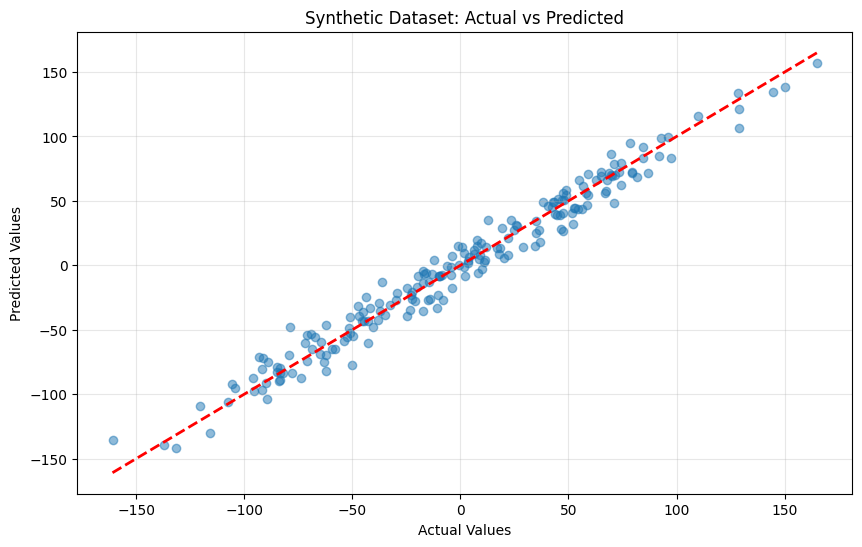

In [6]:
# Train sklearn Linear Regression
lr_sklearn_syn = LinearRegression(fit_intercept=True)
lr_sklearn_syn.fit(X_train_syn_scaled, y_train_syn)

# Make predictions
y_pred_sklearn_syn = lr_sklearn_syn.predict(X_test_syn_scaled)

# Display metrics
print_regression_metrics(y_test_syn, y_pred_sklearn_syn, "sklearn Linear Regression - Synthetic Dataset")

# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test_syn, y_pred_sklearn_syn, alpha=0.5)
plt.plot([y_test_syn.min(), y_test_syn.max()], [y_test_syn.min(), y_test_syn.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Synthetic Dataset: Actual vs Predicted')
plt.grid(True, alpha=0.3)
plt.show()

### 1.5 Hyperparameter Tuning Exercise

Experiment with different hyperparameters and see how they affect the model performance.

**Parameters to experiment with:**

1. **`fit_intercept`** (bool): Whether to calculate the intercept (bias term)
   - `True`: Model learns a bias term (recommended when data isn't centered)
   - `False`: Assumes data is already centered (no bias term)

2. **Feature Scaling**: Compare results with and without StandardScaler
   - Normalized features can improve numerical stability
   - Some datasets may not need scaling if features are already on similar scales

3. **Feature Selection**: Try using different subsets of features
   - Remove less important features
   - See how it affects model performance

**Instructions:**
- Run the code below with different parameter values
- Compare the metrics
- Try removing some features and see the impact

In [7]:
# EXERCISE: Experiment with different hyperparameters

# Parameter 1: fit_intercept
fit_intercept_value = True  # Try True and False

# Parameter 2: Use feature scaling?
use_scaling = True  # Try True and False

# Parameter 3: Feature selection (use all features or a subset)
# Options: 'all', 'subset' (use first 4 features)
feature_selection = 'subset'  # Try 'all' or 'subset'

# Prepare data
X_exercise = X_ca.copy()
y_exercise = y_ca.copy()

# Feature selection
if feature_selection == 'subset':
    X_exercise = X_exercise[:, :4]  # Use first 4 features
    print(f"Using subset of features: {california_housing.feature_names[:4]}")
else:
    print(f"Using all features: {california_housing.feature_names}")

# Split data
X_train_ex, X_test_ex, y_train_ex, y_test_ex = train_test_split(
    X_exercise, y_exercise, test_size=0.2, random_state=42
)

# Feature scaling
if use_scaling:
    scaler_ex = StandardScaler()
    X_train_ex_scaled = scaler_ex.fit_transform(X_train_ex)
    X_test_ex_scaled = scaler_ex.transform(X_test_ex)
    X_train_final = X_train_ex_scaled
    X_test_final = X_test_ex_scaled
    print("Using feature scaling: Yes")
else:
    X_train_final = X_train_ex
    X_test_final = X_test_ex
    print("Using feature scaling: No")

# Train model
lr_exercise = LinearRegression(fit_intercept=fit_intercept_value)
lr_exercise.fit(X_train_final, y_train_ex)

# Make predictions
y_pred_exercise = lr_exercise.predict(X_test_final)

# Display metrics
print(f"\nfit_intercept = {fit_intercept_value}")
print_regression_metrics(y_test_ex, y_pred_exercise, "Exercise Model - California Housing")

# Compare with baseline (all features, scaling, fit_intercept=True)
lr_baseline = LinearRegression(fit_intercept=True)
scaler_baseline = StandardScaler()
X_train_baseline = scaler_baseline.fit_transform(X_train_ca)
X_test_baseline = scaler_baseline.transform(X_test_ca)
lr_baseline.fit(X_train_baseline, y_train_ca)
y_pred_baseline = lr_baseline.predict(X_test_baseline)

print("\nBaseline Model (all features, scaling, fit_intercept=True):")
print_regression_metrics(y_test_ca, y_pred_baseline, "Baseline Model")

Using subset of features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']
Using feature scaling: Yes

fit_intercept = True

Exercise Model - California Housing - Regression Metrics
                        Metric  Value
      Mean Squared Error (MSE) 0.6436
Root Mean Squared Error (RMSE) 0.8022
     Mean Absolute Error (MAE) 0.5804
                R-squared (R²) 0.5089


Baseline Model (all features, scaling, fit_intercept=True):

Baseline Model - Regression Metrics
                        Metric  Value
      Mean Squared Error (MSE) 0.5559
Root Mean Squared Error (RMSE) 0.7456
     Mean Absolute Error (MAE) 0.5332
                R-squared (R²) 0.5758



---

## Section 2: Logistic Regression

Logistic Regression is used for binary classification. Unlike Linear Regression, there's no closed-form solution, so we use **gradient descent** to optimize the parameters.

### Mathematical Background

- **Sigmoid function**: σ(z) = 1 / (1 + e<sup>-z</sup>)
- **Hypothesis**: h(x) = σ(θ<sup>T</sup>x)
- **Cost function**: Cross-entropy loss
- **Optimization**: Gradient descent with optional L2 regularization

### 2.1 From-Scratch Implementation

Complete the `fit`, `predict_proba`, and `predict` methods in the `LogisticRegressionScratch` class below.

In [8]:
class LogisticRegressionScratch:
    """
    Logistic Regression implementation from scratch using gradient descent.

    Parameters:
    -----------
    learning_rate : float, default=0.01
        Learning rate for gradient descent
    n_iterations : int, default=1000
        Number of iterations for gradient descent
    regularization : float, default=0.0
        L2 regularization strength (lambda). Higher values = stronger regularization.
        Set to 0.0 for no regularization.
    fit_intercept : bool, default=True
        Whether to fit an intercept term
    """

    def __init__(self, learning_rate=0.01, n_iterations=1000, regularization=0.0, fit_intercept=True):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.regularization = regularization
        self.fit_intercept = fit_intercept
        self.weights = None

    def _sigmoid(self, z):
        """
        Sigmoid activation function.

        Parameters:
        -----------
        z : array-like
            Input values

        Returns:
        --------
        sigmoid : array
            Sigmoid of z
        """
        # Clip z to prevent overflow
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """
        Fit the logistic regression model using gradient descent.

        TODO: Implement gradient descent with optional L2 regularization.

        Steps:
        1. If fit_intercept=True, add a column of ones to X
        2. Initialize weights to zeros (shape: (n_features+1, 1) if intercept, else (n_features, 1))
        3. For each iteration:
           a. Compute predictions: h = sigmoid(X @ weights)
           b. Compute gradient:
              - Without regularization: grad = (1/m) * X^T @ (h - y)
              - With L2 regularization: grad = (1/m) * X^T @ (h - y) + (lambda/m) * weights
              (Note: Don't regularize the intercept term if fit_intercept=True)
           c. Update weights: weights = weights - learning_rate * grad
        4. Store final weights in self.weights

        Parameters:
        -----------
        X : array-like of shape (n_samples, n_features)
            Training features
        y : array-like of shape (n_samples,)
            Binary target labels (0 or 1)

        Returns:
        --------
        self : object
            Returns self for method chaining
        """
        X = np.array(X)
        y = np.array(y).reshape(-1, 1)

        # Add intercept column if needed
        if self.fit_intercept:
            X = np.column_stack([np.ones(X.shape[0]), X])

        # TODO: Initialize weights (zeros)

        # TODO: Gradient descent loop
        # for i in range(self.n_iterations):
        #     # Compute predictions
        #     # Compute gradient
        #     # Apply regularization (if regularization > 0)
        #     # Update weights

        pass

    def predict_proba(self, X):
        """
        Predict class probabilities.

        TODO: Return the probability of class 1 for each sample.
        Formula: P(y=1|x) = sigmoid(X @ weights)

        Steps:
        1. If fit_intercept=True, add a column of ones to X
        2. Compute z = X @ self.weights
        3. Return sigmoid(z)

        Parameters:
        -----------
        X : array-like of shape (n_samples, n_features)
            Features to predict

        Returns:
        --------
        probabilities : array of shape (n_samples,)
            Probability of class 1 for each sample
        """
        X = np.array(X)

        # TODO: Your implementation here

        pass

    def predict(self, X, threshold=0.5):
        """
        Predict class labels.

        TODO: Return binary class predictions (0 or 1) based on probability threshold.

        Steps:
        1. Get probabilities using predict_proba()
        2. Return 1 if probability >= threshold, else 0

        Parameters:
        -----------
        X : array-like of shape (n_samples, n_features)
            Features to predict
        threshold : float, default=0.5
            Probability threshold for classification

        Returns:
        --------
        predictions : array of shape (n_samples,)
            Binary class predictions (0 or 1)
        """
        # TODO: Your implementation here

        pass

### 2.2 Using sklearn's Logistic Regression

Now let's see how to use sklearn's implementation.

### 2.3 Dataset 1: Breast Cancer Wisconsin

A classic binary classification dataset for predicting malignant vs benign tumors.

In [9]:
# Load Breast Cancer dataset
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

print(f"Dataset shape: {X_cancer.shape}")
print(f"Number of features: {len(cancer.feature_names)}")
print(f"Classes: {cancer.target_names}")
print(f"Class distribution: {np.bincount(y_cancer)}")

# Split into train and test sets
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer
)

# Scale features (important for logistic regression)
scaler_cancer = StandardScaler()
X_train_cancer_scaled = scaler_cancer.fit_transform(X_train_cancer)
X_test_cancer_scaled = scaler_cancer.transform(X_test_cancer)

print(f"\nTraining set size: {X_train_cancer_scaled.shape[0]}")
print(f"Test set size: {X_test_cancer_scaled.shape[0]}")

Dataset shape: (569, 30)
Number of features: 30
Classes: ['malignant' 'benign']
Class distribution: [212 357]

Training set size: 455
Test set size: 114


In [10]:
# Train sklearn Logistic Regression
lr_sklearn_cancer = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=1000, random_state=42)
lr_sklearn_cancer.fit(X_train_cancer_scaled, y_train_cancer)

# Make predictions
y_pred_cancer = lr_sklearn_cancer.predict(X_test_cancer_scaled)

# Display metrics
print_classification_metrics(y_test_cancer, y_pred_cancer, "sklearn Logistic Regression - Breast Cancer")


sklearn Logistic Regression - Breast Cancer - Classification Metrics
             Metric  Value
           Accuracy 0.9825
F1 Score (Weighted) 0.9825
   F1 Score (Macro) 0.9812



### 2.4 Dataset 2: Iris Dataset (Binary Subset)

Using the famous Iris dataset, but converting it to binary classification.

In [11]:
# Load Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Convert to binary classification: class 0 vs classes 1 and 2
# We'll classify class 0 (setosa) vs others
y_iris_binary = (y_iris == 0).astype(int)

print(f"Dataset shape: {X_iris.shape}")
print(f"Features: {iris.feature_names}")
print(f"Original classes: {iris.target_names}")
print(f"Binary classes: Setosa (1) vs Others (0)")
print(f"Class distribution: {np.bincount(y_iris_binary)}")

# Split into train and test sets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris_binary, test_size=0.2, random_state=42, stratify=y_iris_binary
)

# Scale features
scaler_iris = StandardScaler()
X_train_iris_scaled = scaler_iris.fit_transform(X_train_iris)
X_test_iris_scaled = scaler_iris.transform(X_test_iris)

print(f"\nTraining set size: {X_train_iris_scaled.shape[0]}")
print(f"Test set size: {X_test_iris_scaled.shape[0]}")

Dataset shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Original classes: ['setosa' 'versicolor' 'virginica']
Binary classes: Setosa (1) vs Others (0)
Class distribution: [100  50]

Training set size: 120
Test set size: 30


In [12]:
# Train sklearn Logistic Regression
lr_sklearn_iris = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=1000, random_state=42)
lr_sklearn_iris.fit(X_train_iris_scaled, y_train_iris)

# Make predictions
y_pred_iris = lr_sklearn_iris.predict(X_test_iris_scaled)

# Display metrics
print_classification_metrics(y_test_iris, y_pred_iris, "sklearn Logistic Regression - Iris Binary")


sklearn Logistic Regression - Iris Binary - Classification Metrics
             Metric  Value
           Accuracy 1.0000
F1 Score (Weighted) 1.0000
   F1 Score (Macro) 1.0000



### 2.5 Dataset 3: Synthetic Classification Dataset

A synthetic dataset where we can control the separability of classes.

In [13]:
# Generate synthetic classification dataset
X_syn_clf, y_syn_clf = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=5,
    n_redundant=2,
    n_classes=2,
    random_state=42
)

print(f"Dataset shape: {X_syn_clf.shape}")
print(f"Class distribution: {np.bincount(y_syn_clf)}")

# Split into train and test sets
X_train_syn_clf, X_test_syn_clf, y_train_syn_clf, y_test_syn_clf = train_test_split(
    X_syn_clf, y_syn_clf, test_size=0.2, random_state=42, stratify=y_syn_clf
)

# Scale features
scaler_syn_clf = StandardScaler()
X_train_syn_clf_scaled = scaler_syn_clf.fit_transform(X_train_syn_clf)
X_test_syn_clf_scaled = scaler_syn_clf.transform(X_test_syn_clf)

print(f"\nTraining set size: {X_train_syn_clf_scaled.shape[0]}")
print(f"Test set size: {X_test_syn_clf_scaled.shape[0]}")

Dataset shape: (1000, 10)
Class distribution: [497 503]

Training set size: 800
Test set size: 200


In [14]:
# Train sklearn Logistic Regression
lr_sklearn_syn_clf = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=1000, random_state=42)
lr_sklearn_syn_clf.fit(X_train_syn_clf_scaled, y_train_syn_clf)

# Make predictions
y_pred_syn_clf = lr_sklearn_syn_clf.predict(X_test_syn_clf_scaled)

# Display metrics
print_classification_metrics(y_test_syn_clf, y_pred_syn_clf, "sklearn Logistic Regression - Synthetic Dataset")


sklearn Logistic Regression - Synthetic Dataset - Classification Metrics
             Metric  Value
           Accuracy 0.8550
F1 Score (Weighted) 0.8548
   F1 Score (Macro) 0.8548



### 2.6 Regularization in Logistic Regression

Regularization helps prevent overfitting by penalizing large weights.

**Types of Regularization:**

1. **L2 Regularization (Ridge)**: Penalizes the sum of squared weights
   - Encourages smaller, more distributed weights
   - Formula: Cost + λ * Σ(θ²)
   - In sklearn: `penalty='l2'`

2. **L1 Regularization (Lasso)**: Penalizes the sum of absolute weights
   - Can drive some weights to exactly zero (feature selection)
   - Formula: Cost + λ * Σ|θ|
   - In sklearn: `penalty='l1'`

3. **Elastic Net**: Combination of L1 and L2
   - In sklearn: `penalty='elasticnet'`

**The `C` parameter:**
- `C` is the **inverse** of regularization strength
- `C = 1/λ` where λ is the regularization parameter
- **Smaller C** = stronger regularization (more penalty)
- **Larger C** = weaker regularization (less penalty)
- `C=1.0` is the default

Let's see how different `C` values affect the model:

In [15]:
# Experiment with different C values on Breast Cancer dataset
C_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

results = []

for C_val in C_values:
    lr_temp = LogisticRegression(C=C_val, penalty='l2', solver='lbfgs', max_iter=1000, random_state=42)
    lr_temp.fit(X_train_cancer_scaled, y_train_cancer)
    y_pred_temp = lr_temp.predict(X_test_cancer_scaled)

    accuracy = accuracy_score(y_test_cancer, y_pred_temp)
    f1 = f1_score(y_test_cancer, y_pred_temp)

    results.append({
        'C': C_val,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Regularization Strength': 'Strong' if C_val < 0.1 else 'Medium' if C_val < 10 else 'Weak'
    })

results_df = pd.DataFrame(results)
print("\nEffect of C parameter on Breast Cancer dataset:")
print("="*60)
print(results_df.to_string(index=False))
print("="*60)
print("\nNote: Smaller C = stronger regularization (more penalty on large weights)")


Effect of C parameter on Breast Cancer dataset:
      C  Accuracy  F1 Score Regularization Strength
  0.001  0.929825  0.947368                  Strong
  0.010  0.947368  0.959459                  Strong
  0.100  0.973684  0.979310                  Medium
  1.000  0.982456  0.986111                  Medium
 10.000  0.964912  0.972222                    Weak
100.000  0.947368  0.957746                    Weak

Note: Smaller C = stronger regularization (more penalty on large weights)


### 2.7 Hyperparameter Tuning Exercises

Experiment with different hyperparameters for each dataset and see how they affect performance.

**Key Parameters:**

1. **`C`** (float): Inverse of regularization strength
   - Smaller values = stronger regularization (prevents overfitting)
   - Larger values = weaker regularization (may overfit)
   - Default: 1.0
   - Try: 0.001, 0.01, 0.1, 1.0, 10.0, 100.0

2. **`penalty`** (str): Type of regularization
   - `'l1'`: Lasso regularization (can zero out features)
   - `'l2'`: Ridge regularization (default, shrinks weights)
   - `'elasticnet'`: Combination of L1 and L2
   - `'none'`: No regularization
   - Note: Not all solvers support all penalties

3. **`solver`** (str): Algorithm for optimization
   - `'lbfgs'`: Good for small datasets, supports L2
   - `'liblinear'`: Good for small datasets, supports L1 and L2
   - `'saga'`: Supports all penalties, good for large datasets
   - `'newton-cg'`: Good for small datasets, supports L2

4. **`max_iter`** (int): Maximum iterations for solver
   - Increase if convergence warning appears
   - Default: 100
   - Try: 100, 500, 1000, 2000

#### Exercise 1: Breast Cancer Dataset

In [16]:
# EXERCISE 1: Tune hyperparameters for Breast Cancer dataset

# Experiment with these parameters:
C_value = 1.0  # Try: 0.01, 0.1, 1.0, 10.0, 100.0
penalty_type = 'l2'  # Try: 'l1', 'l2', 'elasticnet'
solver_type = 'lbfgs'  # Try: 'lbfgs', 'liblinear', 'saga'
max_iterations = 1000  # Try: 100, 500, 1000, 2000

# Note: Not all solver/penalty combinations work together
# - 'lbfgs': supports 'l2' and 'none'
# - 'liblinear': supports 'l1' and 'l2'
# - 'saga': supports all penalties

lr_ex1 = LogisticRegression(
    C=C_value,
    penalty=penalty_type,
    solver=solver_type,
    max_iter=max_iterations,
    random_state=42
)

lr_ex1.fit(X_train_cancer_scaled, y_train_cancer)
y_pred_ex1 = lr_ex1.predict(X_test_cancer_scaled)

print(f"Parameters: C={C_value}, penalty='{penalty_type}', solver='{solver_type}', max_iter={max_iterations}")
print_classification_metrics(y_test_cancer, y_pred_ex1, "Exercise 1 - Breast Cancer")

Parameters: C=1.0, penalty='l2', solver='lbfgs', max_iter=1000

Exercise 1 - Breast Cancer - Classification Metrics
             Metric  Value
           Accuracy 0.9825
F1 Score (Weighted) 0.9825
   F1 Score (Macro) 0.9812



#### Exercise 2: Iris Binary Dataset

In [17]:
# EXERCISE 2: Tune hyperparameters for Iris Binary dataset

# Experiment with these parameters:
C_value = 1.0  # Try: 0.01, 0.1, 1.0, 10.0, 100.0
penalty_type = 'l2'  # Try: 'l1', 'l2', 'elasticnet'
solver_type = 'lbfgs'  # Try: 'lbfgs', 'liblinear', 'saga'
max_iterations = 1000  # Try: 100, 500, 1000, 2000

lr_ex2 = LogisticRegression(
    C=C_value,
    penalty=penalty_type,
    solver=solver_type,
    max_iter=max_iterations,
    random_state=42
)

lr_ex2.fit(X_train_iris_scaled, y_train_iris)
y_pred_ex2 = lr_ex2.predict(X_test_iris_scaled)

print(f"Parameters: C={C_value}, penalty='{penalty_type}', solver='{solver_type}', max_iter={max_iterations}")
print_classification_metrics(y_test_iris, y_pred_ex2, "Exercise 2 - Iris Binary")

Parameters: C=1.0, penalty='l2', solver='lbfgs', max_iter=1000

Exercise 2 - Iris Binary - Classification Metrics
             Metric  Value
           Accuracy 1.0000
F1 Score (Weighted) 1.0000
   F1 Score (Macro) 1.0000



#### Exercise 3: Synthetic Classification Dataset

In [18]:
# EXERCISE 3: Tune hyperparameters for Synthetic Classification dataset

# Experiment with these parameters:
C_value = 1.0  # Try: 0.01, 0.1, 1.0, 10.0, 100.0
penalty_type = 'l2'  # Try: 'l1', 'l2', 'elasticnet'
solver_type = 'lbfgs'  # Try: 'lbfgs', 'liblinear', 'saga'
max_iterations = 1000  # Try: 100, 500, 1000, 2000

lr_ex3 = LogisticRegression(
    C=C_value,
    penalty=penalty_type,
    solver=solver_type,
    max_iter=max_iterations,
    random_state=42
)

lr_ex3.fit(X_train_syn_clf_scaled, y_train_syn_clf)
y_pred_ex3 = lr_ex3.predict(X_test_syn_clf_scaled)

print(f"Parameters: C={C_value}, penalty='{penalty_type}', solver='{solver_type}', max_iter={max_iterations}")
print_classification_metrics(y_test_syn_clf, y_pred_ex3, "Exercise 3 - Synthetic Classification")

Parameters: C=1.0, penalty='l2', solver='lbfgs', max_iter=1000

Exercise 3 - Synthetic Classification - Classification Metrics
             Metric  Value
           Accuracy 0.8550
F1 Score (Weighted) 0.8548
   F1 Score (Macro) 0.8548



In [19]:
print("End")

End
